<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/X4Neural_Network_Multi_Classs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis(1).csv')

df0 = df[df['train'] == 0]
df = df[df['train'] == 1]
df = df[df['n/m'] != 2]

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] 
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']




In [ ]:
shuffled0 = df0.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus', 'train'] 
select = [x for x in shuffled.columns if x not in columns_dont_want]

X0 = shuffled0.loc[:, select]

y0 = shuffled0.loc[:,'y']

In [ ]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
X_modified = X

In [ ]:
from imblearn.over_sampling import RandomOverSampler

names = ['n/m', 'max','av.length']
X_modified = X.drop([ 'n', 'median', 'range', 'std.dev',  'min','indeks', 'class',  'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n','m'], axis = 1)
X_modified['n/m'] = X_modified['n/m']
#print(X_modified.head())

oversample = RandomOverSampler(random_state=0)
#oversample.fit(X_modified, y_encoded)
X_modified, y_encoded = oversample.fit_resample(X_modified, y_encoded)

In [ ]:
y_new = []
for val in y0:
  if(val<0.0005):
    y_new.append(0)
  elif(0.0005 <= val and val <0.1):
    y_new.append(1)
  elif(0.1<=val and val<5):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled0['y_new'] = y_new
y_encoded0 = shuffled0.loc[:,'y_new']
y_new = np.array(y_new)
plt.hist(y_new)
plt.show()
X_modified0 = X0

In [ ]:
from imblearn.over_sampling import RandomOverSampler

names = [ 'n', 'm', 'max','std.dev', 'av.length']
X_modified0 = X0.drop(['range','n/m', 'min', 'class','median', 'k',  'indeks',   'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n'], axis = 1)
print(X_modified0.head())

oversample = RandomOverSampler(random_state=0)
X_modified0, y_encoded0 = oversample.fit_resample(X_modified0, y_encoded0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
l_encode = LabelEncoder()
l_encode.fit(y_encoded0)
y_encoded0 = l_encode.transform(y_encoded0)
y_encoded0 = to_categorical(y_encoded0)
y_encoded0

In [ ]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.9)

X_test = pd.concat([X_test, X_modified0])

y_new = []
for val in y_encoded0:
  if(val[0]==1):
    y_new.append(2)
  else:
    y_new.append(3)

y_test = y_test + y_new


print(X_train.shape[0])
print(X_test.shape[0])

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)


9794
2006


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(16, input_dim = X_modified.shape[1], activation='relu'))

classifier.add(Dropout(0.2))

classifier.add(Dense(4, activation = 'softmax'))
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 25, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 32, 
                    epochs = 500)


Epoch 1/500
307/307 [==============================] - 4s 7ms/step - loss: 1.0932 - accuracy: 0.4947
Epoch 2/500
307/307 [==============================] - 1s 4ms/step - loss: 0.8551 - accuracy: 0.6337
Epoch 3/500
307/307 [==============================] - 1s 4ms/step - loss: 0.7754 - accuracy: 0.6674
Epoch 4/500
307/307 [==============================] - 1s 4ms/step - loss: 0.7408 - accuracy: 0.6848
Epoch 5/500
307/307 [==============================] - 1s 4ms/step - loss: 0.7130 - accuracy: 0.6983
Epoch 6/500
307/307 [==============================] - 1s 4ms/step - loss: 0.6988 - accuracy: 0.7044
Epoch 7/500
307/307 [==============================] - 1s 3ms/step - loss: 0.6903 - accuracy: 0.7065
Epoch 8/500
307/307 [==============================] - 1s 4ms/step - loss: 0.6716 - accuracy: 0.7170
Epoch 9/500
307/307 [==============================] - 1s 4ms/step - loss: 0.6643 - accuracy: 0.7191
Epoch 10/500
307/307 [==============================] - 1s 3ms/step - loss: 0.6620 - accura

accuracy: 81.01%


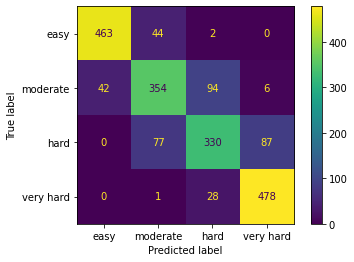

In [ ]:
from keras.metrics import accuracy
pred = classifier.predict(X_test)
pred_ = np.argmax(pred, axis = 1)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard', 'very hard'])

cmd.plot()

cnt = 0
cnt_correct = 0
for i in range(len(pred)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')


ROC AUC score: 0.8726563278292363


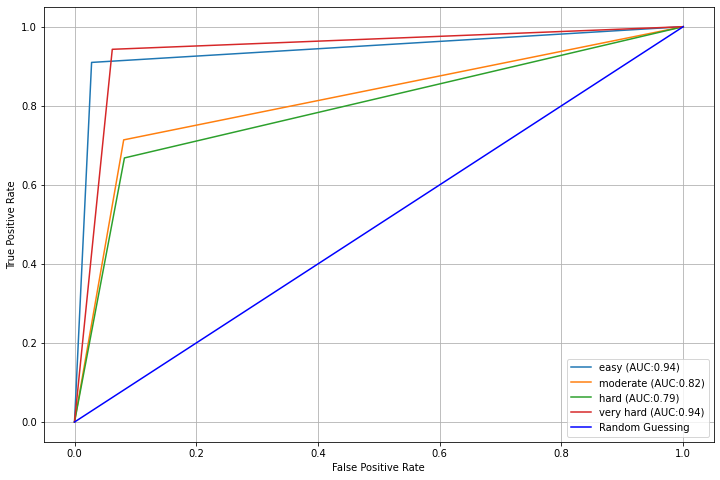

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['easy', 'moderate', 'hard', 'very hard']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_y, pred_))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()